In [85]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [86]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [87]:
train_labels[0]

1

In [88]:
max([max(sequence) for sequence in train_data])

9999

In [89]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [90]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [91]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듬
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듬
    return results

# 훈련 데이터를 벡터로 변환함
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환함
x_test = vectorize_sequences(test_data)

In [92]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [93]:
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [94]:
# 레이블을 벡터로 바꿈
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [95]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [96]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [97]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [98]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [82]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [99]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5149 - acc: 0.7972 - val_loss: 0.3907 - val_acc: 0.8618
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3045 - acc: 0.9048 - val_loss: 0.3328 - val_acc: 0.8666
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2264 - acc: 0.9271 - val_loss: 0.2819 - val_acc: 0.8895
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1763 - acc: 0.9443 - val_loss: 0.2873 - val_acc: 0.8854
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1467 - acc: 0.9521 - val_loss: 0.2822 - val_acc: 0.8890
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1205 - acc: 0.9630 - val_loss: 0.2913 - val_acc: 0.8854
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1010 - acc: 0.9711 - val_loss: 0.3495 - val_acc: 0.8756
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0842 - a

In [84]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

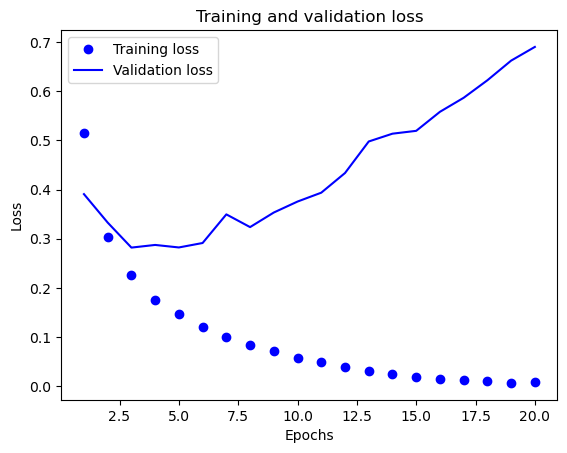

In [101]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

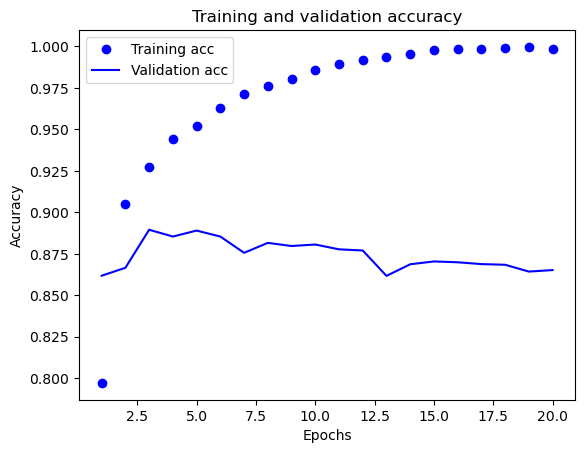

In [102]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [104]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4955 - accuracy: 0.8021
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2829 - accuracy: 0.9047
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2120 - accuracy: 0.9275
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2916 - accuracy: 0.8848


In [107]:
print(results)

[0.2915864884853363, 0.8848400115966797]


In [109]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.21489438],
       [0.9999739 ],
       [0.96616805],
       ...,
       [0.14528608],
       [0.11756521],
       [0.72294456]], dtype=float32)

In [110]:
#1개의 은닉 층을 사용하고 검증 정확도에 어떤 영향을 미치는지 확인
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5076 - acc: 0.7972 - val_loss: 0.4121 - val_acc: 0.8426
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3254 - acc: 0.8998 - val_loss: 0.3241 - val_acc: 0.8848
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2512 - acc: 0.9243 - val_loss: 0.3006 - val_acc: 0.8842
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2062 - acc: 0.9374 - val_loss: 0.2775 - val_acc: 0.8900
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1753 - acc: 0.9473 - val_loss: 0.2744 - val_acc: 0.8889
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1514 - acc: 0.9551 - val_loss: 0.2754 - val_acc: 0.8884
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1322 - acc: 0.9620 - val_loss: 0.2801 - val_acc: 0.8870
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1158 - a

In [111]:
#3개의 은닉 층을 사용하고 검증 정확도에 어떤 영향을 미치는지 확인
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5782 - acc: 0.7467 - val_loss: 0.4460 - val_acc: 0.8647
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3485 - acc: 0.8928 - val_loss: 0.3210 - val_acc: 0.8845
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2385 - acc: 0.9243 - val_loss: 0.2861 - val_acc: 0.8899
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1812 - acc: 0.9414 - val_loss: 0.2817 - val_acc: 0.8881
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1457 - acc: 0.9541 - val_loss: 0.2865 - val_acc: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1133 - acc: 0.9646 - val_loss: 0.3068 - val_acc: 0.8841
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0941 - acc: 0.9717 - val_loss: 0.3271 - val_acc: 0.8839
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0766 - a

In [112]:
#층의 은닉 유닛 추가 (32개 유닛의 경우) 및 검증 정확도 확인
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4973 - acc: 0.7852 - val_loss: 0.3786 - val_acc: 0.8586
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2712 - acc: 0.9101 - val_loss: 0.3030 - val_acc: 0.8784
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2027 - acc: 0.9295 - val_loss: 0.2835 - val_acc: 0.8869
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1552 - acc: 0.9462 - val_loss: 0.2935 - val_acc: 0.8843
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1210 - acc: 0.9614 - val_loss: 0.2941 - val_acc: 0.8880
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0980 - acc: 0.9697 - val_loss: 0.3407 - val_acc: 0.8796
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0739 - acc: 0.9779 - val_loss: 0.3485 - val_acc: 0.8782
Epoch 8/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0591 - a

In [113]:
#층의 은닉 유닛 추가 (64개 유닛의 경우) 및 검증 정확도 확인
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.4898 - acc: 0.7566 - val_loss: 0.3270 - val_acc: 0.8755
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2610 - acc: 0.9030 - val_loss: 0.3019 - val_acc: 0.8781
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1883 - acc: 0.9327 - val_loss: 0.2825 - val_acc: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1417 - acc: 0.9489 - val_loss: 0.3135 - val_acc: 0.8774
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1055 - acc: 0.9651 - val_loss: 0.4188 - val_acc: 0.8601
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0710 - acc: 0.9778 - val_loss: 0.4162 - val_acc: 0.8732
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0616 - acc: 0.9814 - val_loss: 0.3823 - val_acc: 0.8793
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0445 - a

In [114]:
#binary_crossentropy 대신 mse 손실 함수를 사용한 검증
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1540 - acc: 0.7895 - val_loss: 0.1136 - val_acc: 0.8522
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0756 - acc: 0.9050 - val_loss: 0.0837 - val_acc: 0.8891
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0567 - acc: 0.9295 - val_loss: 0.0826 - val_acc: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0407 - acc: 0.9511 - val_loss: 0.0912 - val_acc: 0.8781
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0300 - acc: 0.9655 - val_loss: 0.0854 - val_acc: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0209 - acc: 0.9769 - val_loss: 0.0898 - val_acc: 0.8796
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0207 - acc: 0.9759 - val_loss: 0.0902 - val_acc: 0.8821
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0143 - a

In [115]:
#relu 대신 tanh 활성화 함수를 사용한 검증
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.4396 - acc: 0.8045 - val_loss: 0.3217 - val_acc: 0.8676
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2356 - acc: 0.9063 - val_loss: 0.2821 - val_acc: 0.8870
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1637 - acc: 0.9369 - val_loss: 0.4621 - val_acc: 0.8375
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1330 - acc: 0.9489 - val_loss: 0.3302 - val_acc: 0.8830
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1180 - acc: 0.9563 - val_loss: 0.4137 - val_acc: 0.8622
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0837 - acc: 0.9697 - val_loss: 0.4201 - val_acc: 0.8697
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0639 - acc: 0.9775 - val_loss: 0.4668 - val_acc: 0.8712
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0647 - a

In [116]:
#1개의 은닉 층을 사용하고 테스트 정확도에 어떤 영향을 미치는지 확인
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4416 - accuracy: 0.8327
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2729 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2171 - accuracy: 0.9269
Epoch 4/4
782/782 [==============================] - 1s 994us/step - loss: 0.2794 - accuracy: 0.8894


In [118]:
#3개의 은닉 층을 사용하고 테스트 정확도에 어떤 영향을 미치는지 확인
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4530 - accuracy: 0.8183
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2530 - accuracy: 0.9109
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2005 - accuracy: 0.9286
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3017 - accuracy: 0.8816


In [119]:
#층의 은닉 유닛 추가 (32개 유닛의 경우) 및 테스트 정확도 확인
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4122 - accuracy: 0.8276
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2375 - accuracy: 0.9100
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1863 - accuracy: 0.9318
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3551 - accuracy: 0.8666


In [122]:
#층의 은닉 유닛 추가 (64개 유닛의 경우) 및 테스트 정확도 확인
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 6s 19ms/step - loss: 0.4169 - accuracy: 0.8166
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2377 - accuracy: 0.9095
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1814 - accuracy: 0.9309
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3312 - accuracy: 0.8760


In [121]:
#binary_crossentropy 대신 mse 손실 함수를 사용한 테스트
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.1545 - accuracy: 0.8165
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0806 - accuracy: 0.9112
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0605 - accuracy: 0.9297
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.0853 - accuracy: 0.8842


In [124]:
#relu 대신 tanh 활성화 함수를 사용한 테스트
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4232 - accuracy: 0.8318
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2359 - accuracy: 0.9138
Epoch 3/4
49/49 [==============================] - 1s 10ms/step - loss: 0.1780 - accuracy: 0.9340
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.4013 - accuracy: 0.8535
